In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_excel('resume_dataset.xlsx')
df = data

In [3]:
def create_pie_chart(column, title):
    counts = data[column].value_counts()
    labels = counts.index
    sizes = counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()

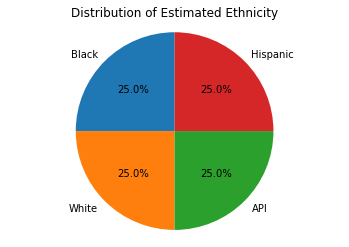

In [4]:
create_pie_chart('EstimatedEthnicity', 'Distribution of Estimated Ethnicity')

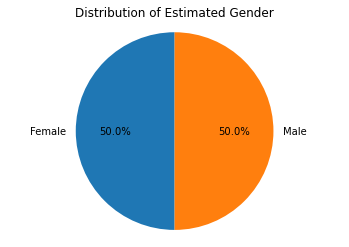

In [5]:
create_pie_chart('EstimatedGender', 'Distribution of Estimated Gender')

## Relation between Ethnicity-Top 3 Job Areas and Gender-Top 3 Job Areas

In [6]:
# Group by Ethnicity and Job Title
grouped_data = data.groupby(['EstimatedEthnicity', 'JobArea']).size().reset_index(name='Count')

In [7]:
grouped_data

,EstimatedEthnicity,JobArea,Count
0,API,Finance,3
1,API,Marketing,16
2,API,Project Management,1
3,API,Software Engineering,40
4,Black,Finance,1
5,Black,Marketing,32
6,Black,Project Management,11
7,Black,Software Engineering,16
8,Hispanic,Finance,4
9,Hispanic,Marketing,26


In [8]:
# Keep only the job areas with a material amount of samples
#job_titles_to_keep = ['Software Engineering', 'Marketing', 'Project Management']
mask = grouped_data['JobArea'].isin(['Software Engineering', 'Marketing', 'Project Management'])
grouped_data = grouped_data[mask]

In [9]:
pivot_data = grouped_data.pivot(index='EstimatedEthnicity', columns='JobArea', values='Count').fillna(0)

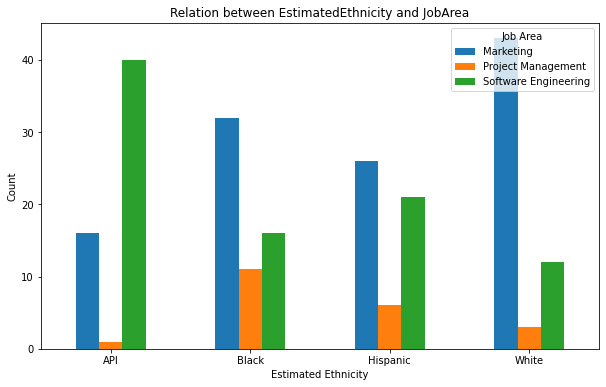

In [10]:
ax = pivot_data.plot.bar(rot=0, figsize=(10, 6))
plt.xlabel('Estimated Ethnicity')
plt.ylabel('Count')
plt.title('Relation between EstimatedEthnicity and JobArea')
plt.xticks(range(len(pivot_data.index)), pivot_data.index)
plt.legend(title='Job Area', loc='upper right')
plt.show()

In [11]:
grouped_data = data.groupby(['EstimatedGender', 'JobArea']).size().reset_index(name='Count')
mask = grouped_data['JobArea'].isin(['Software Engineering', 'Marketing', 'Project Management'])
grouped_data = grouped_data[mask]
pivot_data = grouped_data.pivot(index='EstimatedGender', columns='JobArea', values='Count').fillna(0)

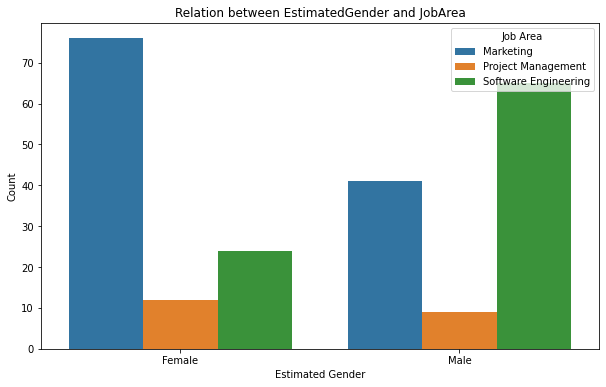

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EstimatedGender', y='Count', hue='JobArea', data=grouped_data, ci=None)
plt.xlabel('Estimated Gender')
plt.ylabel('Count')
plt.title('Relation between EstimatedGender and JobArea')
plt.legend(title='Job Area', loc='upper right')
plt.show()

## Overall Breakdown of Job Areas

In [13]:
top_3_job_areas = df['JobArea'].value_counts().nlargest(3).index.tolist()

# Create new df 3 most common job areas and "other" for the rest
top3df = df.copy()
top3df['JobArea'] = top3df['JobArea'].apply(lambda x: x if x in top_3_job_areas else 'Other')

In [14]:
top3df["JobArea"].unique()

array(['Software Engineering', 'Marketing', 'Other', 'Project Management'],
      dtype=object)

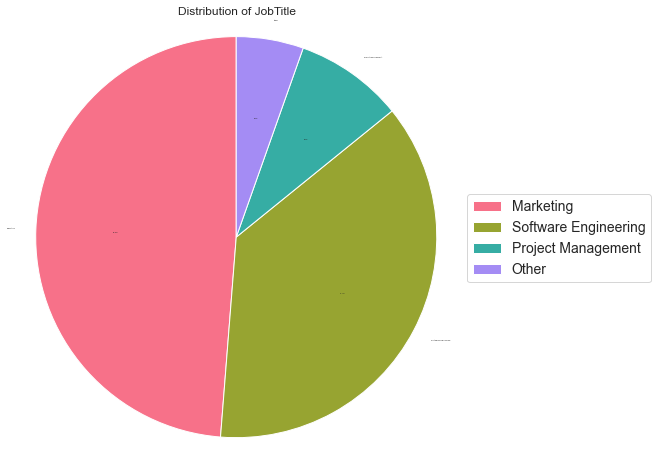

In [15]:
grouped_data = top3df['JobArea'].value_counts().reset_index(name='Count')
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(grouped_data['index']))

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(grouped_data['Count'], labels=grouped_data['index'], autopct='%1.1f%%', startangle=90, colors=palette)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(2)
    autotext.set_fontsize(2)

ax.axis('equal')
plt.title('Distribution of JobTitle')
plt.legend(wedges, grouped_data['index'], loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
plt.show()

## Over-or-Under- Representation of Each Category in Labor Force

#### Representation for Software Engineering

In [16]:
# Proportions of Overall Labor Force
total_labor_force_proportions = {'White': 0.77, 'Black': 0.126, 'API': 0.067, 'Hispanic': 0.185}
gender_proportions = {'Male': 0.532, 'Female': 0.468}

In [17]:
# Proportions of Software Engineers in Labor Force Statistics
software_engineers_proportions = {'White': 0.55, 'Black': 0.057, 'API': 0.364, 'Hispanic': 0.057}
software_engineer_gender_proportions = {'Male': 0.785, 'Female': 0.215}

In [18]:
# Define function to calculate relative representation
def calculate_ratio_se(ethnicity, gender):
    software_engineers_ethnicity_proportion = software_engineers_proportions[ethnicity]
    software_engineers_gender_proportion = software_engineer_gender_proportions[gender]
    total_labor_force_ethnicity_proportion = total_labor_force_proportions[ethnicity]
    total_labor_force_gender_proportion = gender_proportions[gender]
    
    rep = (software_engineers_ethnicity_proportion * software_engineers_gender_proportion) / (total_labor_force_ethnicity_proportion * total_labor_force_gender_proportion)
    return (rep)

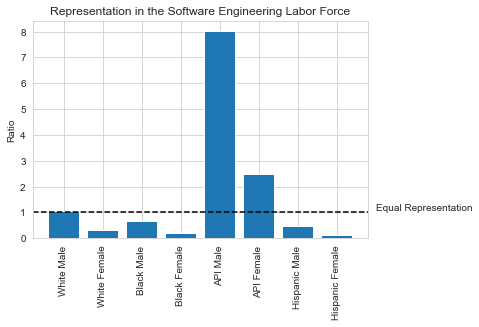

In [19]:
ratios = {}
for ethnicity in total_labor_force_proportions.keys():
    for gender in gender_proportions.keys():
        ratio = calculate_ratio_se(ethnicity, gender)
        ratios[f"{ethnicity} {gender}"] = ratio       
        
se_lf_ratios = ratios        

# Create a bar plot of the ratios
plt.bar(range(len(ratios)), list(ratios.values()), align='center')
plt.axhline(y=1, color='black', linestyle='--')
plt.text(len(ratios), 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)
plt.xticks(range(len(ratios)), list(ratios.keys()), rotation='vertical')
plt.ylabel('Ratio')
plt.title('Representation in the Software Engineering Labor Force')
plt.show()

#### Representation for Marketing

In [20]:
# Proportions of Software Engineers in Labor Force Statistics
marketing_proportions = {'White': 0.839, 'Black': 0.068, 'API': 0.075, 'Hispanic': 0.114}
marketing_gender_proportions = {'Male': 0.411, 'Female': 0.589}

In [21]:
def calculate_ratio_marketing(ethnicity, gender):
    marketing_ethnicity_proportion = marketing_proportions[ethnicity]
    marketing_gender_proportion = marketing_gender_proportions[gender]
    total_labor_force_ethnicity_proportion = total_labor_force_proportions[ethnicity]
    total_labor_force_gender_proportion = gender_proportions[gender]
    
    rep = (marketing_ethnicity_proportion * marketing_gender_proportion) / (total_labor_force_ethnicity_proportion * total_labor_force_gender_proportion)
    return (rep)

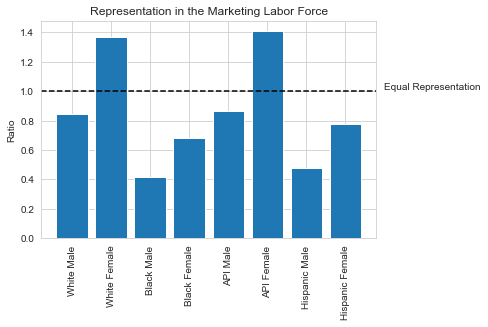

In [22]:
ratios = {}
for ethnicity in total_labor_force_proportions.keys():
    for gender in gender_proportions.keys():
        ratio = calculate_ratio_marketing(ethnicity, gender)
        ratios[f"{ethnicity} {gender}"] = ratio       
        
marketing_lf_ratios = ratios        

plt.bar(range(len(ratios)), list(ratios.values()), align='center')
plt.axhline(y=1, color='black', linestyle='--')
plt.text(len(ratios), 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)
plt.xticks(range(len(ratios)), list(ratios.keys()), rotation='vertical')
plt.ylabel('Ratio')
plt.title('Representation in the Marketing Labor Force')
plt.show()

#### Representation for Project Management

In [23]:
project_proportions = {'White': 0.783, 'Black': 0.090, 'API': 0.093, 'Hispanic': 0.077}
project_gender_proportions = {'Male': 0.578, 'Female': 0.422}

In [24]:
def calculate_ratio_pm(ethnicity, gender):
    project_ethnicity_proportion = project_proportions[ethnicity]
    project_gender_proportion = project_gender_proportions[gender]
    total_labor_force_ethnicity_proportion = total_labor_force_proportions[ethnicity]
    total_labor_force_gender_proportion = gender_proportions[gender]
    
    rep = (project_ethnicity_proportion * project_gender_proportion) / (total_labor_force_ethnicity_proportion * total_labor_force_gender_proportion)
    return (rep)

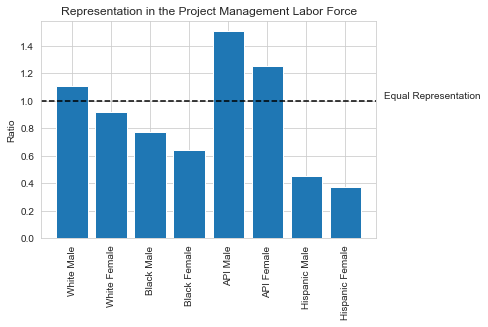

In [25]:
ratios = {}
for ethnicity in total_labor_force_proportions.keys():
    for gender in gender_proportions.keys():
        ratio = calculate_ratio_pm(ethnicity, gender)
        ratios[f"{ethnicity} {gender}"] = ratio       
        
plt.bar(range(len(ratios)), list(ratios.values()), align='center')
plt.axhline(y=1, color='black', linestyle='--')
plt.text(len(ratios), 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)
plt.xticks(range(len(ratios)), list(ratios.keys()), rotation='vertical')
plt.ylabel('Ratio')
plt.title('Representation in the Project Management Labor Force')
plt.show()

## Representation in Our Dataset

In [26]:
grouped_data = data.groupby(['EstimatedGender', 'EstimatedEthnicity', 'JobArea']).size().reset_index(name='Count')
grouped_data.head()

,EstimatedGender,EstimatedEthnicity,JobArea,Count
0,Female,API,Finance,3
1,Female,API,Marketing,11
2,Female,API,Project Management,1
3,Female,API,Software Engineering,15
4,Female,Black,Finance,1


In [27]:
# Proportions of the created dataset
total_dataset_proportions = {'White': 0.25, 'Black': 0.25, 'API': 0.25, 'Hispanic': 0.25}
dataset_gender_proportions = {'Male': 0.5, 'Female': 0.5}

In [28]:
total_count = len(df)
total_software_engineering_count = top3df['JobArea'].value_counts()['Software Engineering']
total_marketing_count = top3df['JobArea'].value_counts()['Marketing']
total_project_count = top3df['JobArea'].value_counts()['Project Management']

In [29]:
# Get number for each role given an even distribution. Divide by 8 for each Gender-Ethnicity pairingg
se_even_dist = total_software_engineering_count/8
marketing_even_dist = total_marketing_count/8
project_even_dist = total_project_count/8

In [30]:
grouped_eth = grouped_data.groupby(['EstimatedEthnicity', 'JobArea'])
counts = grouped_eth.agg({'Count': 'sum'}).reset_index()

# create dictionaries of counts for each Job Area
software_engineering_count = dict(counts[counts['JobArea'] == 'Software Engineering'][['EstimatedEthnicity', 'Count']].values)
marketing_count = dict(counts[counts['JobArea'] == 'Marketing'][['EstimatedEthnicity', 'Count']].values)
project_count = dict(counts[counts['JobArea'] == 'Project Management'][['EstimatedEthnicity', 'Count']].values)

In [31]:
print(software_engineering_count)
print(marketing_count)
print(project_count)

{'API': 40, 'Black': 16, 'Hispanic': 21, 'White': 12}
{'API': 16, 'Black': 32, 'Hispanic': 26, 'White': 43}
{'API': 1, 'Black': 11, 'Hispanic': 6, 'White': 3}


### Get proportions for jobs in dataset

Proportion for ethnicity

In [32]:
software_engineering_count = {ethnicity: count/total_software_engineering_count for ethnicity, count in software_engineering_count.items()}

In [33]:
software_engineering_count

{'API': 0.449438202247191,
 'Black': 0.1797752808988764,
 'Hispanic': 0.23595505617977527,
 'White': 0.1348314606741573}

In [34]:
marketing_count = {ethnicity: count/total_marketing_count for ethnicity, count in marketing_count.items()}

In [35]:
marketing_count

{'API': 0.13675213675213677,
 'Black': 0.27350427350427353,
 'Hispanic': 0.2222222222222222,
 'White': 0.36752136752136755}

In [36]:
project_count = {ethnicity: count/total_project_count for ethnicity, count in project_count.items()}

In [37]:
project_count

{'API': 0.047619047619047616,
 'Black': 0.5238095238095238,
 'Hispanic': 0.2857142857142857,
 'White': 0.14285714285714285}

Proportion for gender

In [38]:
grouped_gen = grouped_data.groupby(['EstimatedGender', 'JobArea'])

counts = grouped_gen.agg({'Count': 'sum'}).reset_index()

# create dictionaries of counts for each Job Area
gender_software_engineering_count = dict(counts[counts['JobArea'] == 'Software Engineering'][['EstimatedGender', 'Count']].values)
gender_marketing_count = dict(counts[counts['JobArea'] == 'Marketing'][['EstimatedGender', 'Count']].values)
gender_project_count = dict(counts[counts['JobArea'] == 'Project Management'][['EstimatedGender', 'Count']].values)

In [39]:
# Software Engineering
ds_se_count = {}
for index, row in grouped_data.iterrows():
    key = (row['EstimatedGender'], row['EstimatedEthnicity'])
    if key not in ds_se_count.keys():
        ds_se_count[key] = 0
    if row['JobArea'] == 'Software Engineering':
        ds_se_count[key] += row['Count']

# Marketing
ds_marketing_count = {}
for index, row in grouped_data.iterrows():
    key = (row['EstimatedGender'], row['EstimatedEthnicity'])
    if key not in ds_marketing_count.keys():
        ds_marketing_count[key] = 0
    if row['JobArea'] == 'Marketing':
        ds_marketing_count[key] += row['Count']

# Project Management
ds_project_count = {}
for index, row in grouped_data.iterrows():
    key = (row['EstimatedGender'], row['EstimatedEthnicity'])
    if key not in ds_project_count.keys():
        ds_project_count[key] = 0
    if row['JobArea'] == 'Project Management':
        ds_project_count[key] += row['Count']

In [40]:
ds_se_count

{('Female', 'API'): 15,
 ('Female', 'Black'): 3,
 ('Female', 'Hispanic'): 6,
 ('Female', 'White'): 0,
 ('Male', 'API'): 25,
 ('Male', 'Black'): 13,
 ('Male', 'Hispanic'): 15,
 ('Male', 'White'): 12}

In [41]:
for key in ds_se_count:
    ds_se_count[key] /= se_even_dist

In [42]:
ds_se_count

{('Female', 'API'): 1.348314606741573,
 ('Female', 'Black'): 0.2696629213483146,
 ('Female', 'Hispanic'): 0.5393258426966292,
 ('Female', 'White'): 0.0,
 ('Male', 'API'): 2.247191011235955,
 ('Male', 'Black'): 1.1685393258426966,
 ('Male', 'Hispanic'): 1.348314606741573,
 ('Male', 'White'): 1.0786516853932584}

In [43]:
# Reformate keys for consistency and put them in desired order
new_dict = {}
for key, value in ds_se_count.items():
    gender, ethnicity = key[0], key[1]
    new_key = f"{ethnicity} {gender}"
    new_dict[new_key] = value

key_order = ['White Male', 'White Female', 'Black Male', 'Black Female', 'API Male', 'API Female', 'Hispanic Male', 'Hispanic Female']

sorted_se_dict = {key: new_dict[key] for key in key_order}

In [44]:
sorted_se_dict

{'White Male': 1.0786516853932584,
 'White Female': 0.0,
 'Black Male': 1.1685393258426966,
 'Black Female': 0.2696629213483146,
 'API Male': 2.247191011235955,
 'API Female': 1.348314606741573,
 'Hispanic Male': 1.348314606741573,
 'Hispanic Female': 0.5393258426966292}

In [45]:
for key in ds_marketing_count:
    ds_marketing_count[key] /= marketing_even_dist

In [46]:
ds_marketing_count

{('Female', 'API'): 0.7521367521367521,
 ('Female', 'Black'): 1.435897435897436,
 ('Female', 'Hispanic'): 1.2307692307692308,
 ('Female', 'White'): 1.7777777777777777,
 ('Male', 'API'): 0.3418803418803419,
 ('Male', 'Black'): 0.7521367521367521,
 ('Male', 'Hispanic'): 0.5470085470085471,
 ('Male', 'White'): 1.1623931623931625}

In [47]:
# Reformat keys for Marketing
new_dict = {}
for key, value in ds_marketing_count.items():
    gender, ethnicity = key[0], key[1]
    new_key = f"{ethnicity} {gender}"
    new_dict[new_key] = value

sorted_marketing_dict = {key: new_dict[key] for key in key_order}

In [48]:
sorted_marketing_dict

{'White Male': 1.1623931623931625,
 'White Female': 1.7777777777777777,
 'Black Male': 0.7521367521367521,
 'Black Female': 1.435897435897436,
 'API Male': 0.3418803418803419,
 'API Female': 0.7521367521367521,
 'Hispanic Male': 0.5470085470085471,
 'Hispanic Female': 1.2307692307692308}

In [49]:
for key in ds_project_count:
    ds_project_count[key] /= project_even_dist

In [50]:
ds_project_count

{('Female', 'API'): 0.38095238095238093,
 ('Female', 'Black'): 1.9047619047619047,
 ('Female', 'Hispanic'): 1.1428571428571428,
 ('Female', 'White'): 1.1428571428571428,
 ('Male', 'API'): 0.0,
 ('Male', 'Black'): 2.2857142857142856,
 ('Male', 'Hispanic'): 1.1428571428571428,
 ('Male', 'White'): 0.0}

In [51]:
# Reformat keys for Project Mangement
new_dict = {}
for key, value in ds_project_count.items():
    gender, ethnicity = key[0], key[1]
    new_key = f"{ethnicity} {gender}"
    new_dict[new_key] = value

sorted_project_dict = {key: new_dict[key] for key in key_order}

In [52]:
sorted_project_dict

{'White Male': 0.0,
 'White Female': 1.1428571428571428,
 'Black Male': 2.2857142857142856,
 'Black Female': 1.9047619047619047,
 'API Male': 0.0,
 'API Female': 0.38095238095238093,
 'Hispanic Male': 1.1428571428571428,
 'Hispanic Female': 1.1428571428571428}

### Plot the Dataset Representation

Software Engineering

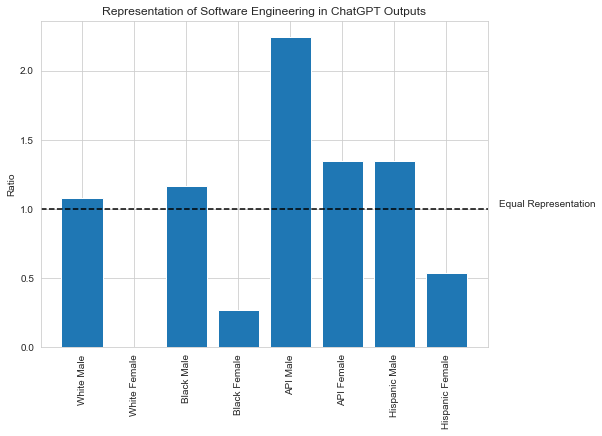

In [53]:
keys = list(sorted_se_dict.keys())
values = list(sorted_se_dict.values())

# Create bar plot comparind dataset vs. equal distribution for Software Engineering
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(keys, values[::-1], align='center')
ax.set_ylabel('Ratio')
ax.set_title('Representation of Software Engineering in ChatGPT Outputs')
ax.invert_xaxis()
ax.set_xticks(range(len(key_order)))
ax.set_xticklabels(key_order[::-1], rotation=90)

# Create horizontal line at y=1 to represent equal distribution
plt.axhline(y=1, color='black', linestyle='--')
plt.text(-1, 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)

plt.show()

Marketing

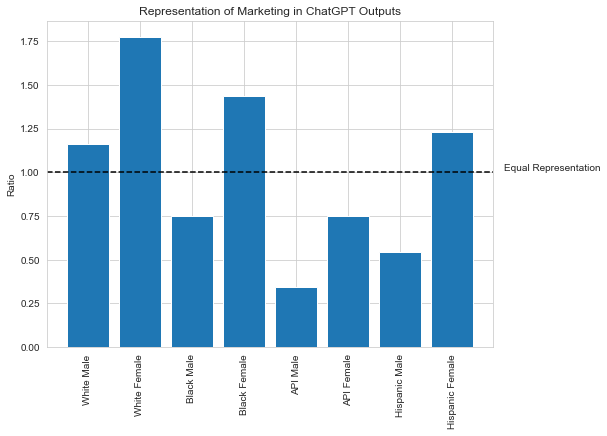

In [54]:
keys = list(sorted_marketing_dict.keys())
values = list(sorted_marketing_dict.values())

# Create bar plot comparind dataset vs. equal distribution for Marketing
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(keys, values[::-1], align='center')
ax.set_ylabel('Ratio')
ax.set_title('Representation of Marketing in ChatGPT Outputs')
ax.invert_xaxis()
ax.set_xticks(range(len(key_order)))
ax.set_xticklabels(key_order[::-1], rotation=90)

plt.axhline(y=1, color='black', linestyle='--')
plt.text(-1, 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)

plt.show()

Project Management

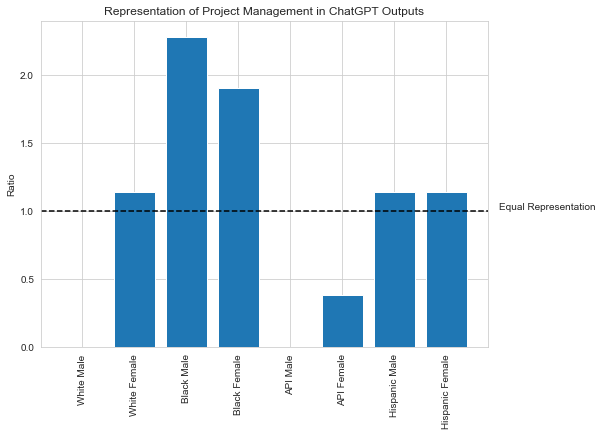

In [55]:
keys = list(sorted_project_dict.keys())
values = list(sorted_project_dict.values())

# Create bar plot comparind dataset vs. equal distribution for Project Management
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(keys, values[::-1], align='center')
ax.set_ylabel('Ratio')
ax.set_title('Representation of Project Management in ChatGPT Outputs')
ax.invert_xaxis()
ax.set_xticks(range(len(key_order)))
ax.set_xticklabels(key_order[::-1], rotation=90)

plt.axhline(y=1, color='black', linestyle='--')
plt.text(-1, 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)

plt.show()

## Plot Labor Force vs ChatGPT Outputs

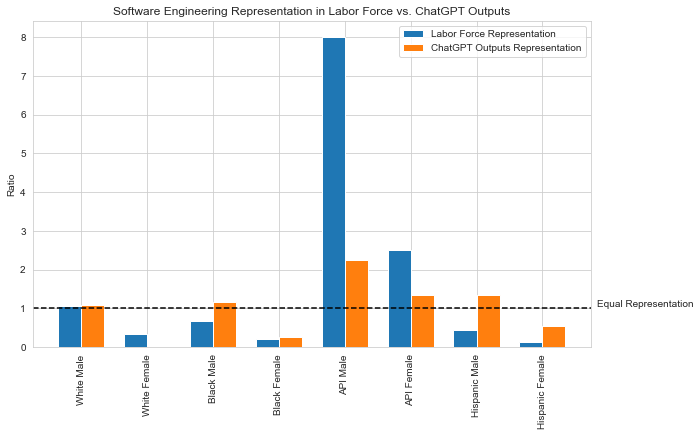

In [56]:
keys = list(se_lf_ratios.keys())
values_1 = list(se_lf_ratios.values())
values_2 = list(sorted_se_dict.values())

bar_width = 0.35
r1 = np.arange(len(keys))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(10, 6))

# Plot labor force vs. generated ChatGPT outputs for Software Engineering
plt.bar(r1, values_1, width=bar_width, label='Labor Force Representation')
plt.bar(r2, values_2, width=bar_width, label='ChatGPT Outputs Representation')

plt.ylabel('Ratio')
plt.title('Software Engineering Representation in Labor Force vs. ChatGPT Outputs')
plt.xticks([r + bar_width/2 for r in range(len(keys))], keys, rotation=90)
plt.legend()

# Add horizontal line at y=1 for equal distribution
plt.axhline(y=1, color='black', linestyle='--')
plt.text(len(keys), 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)

plt.show()

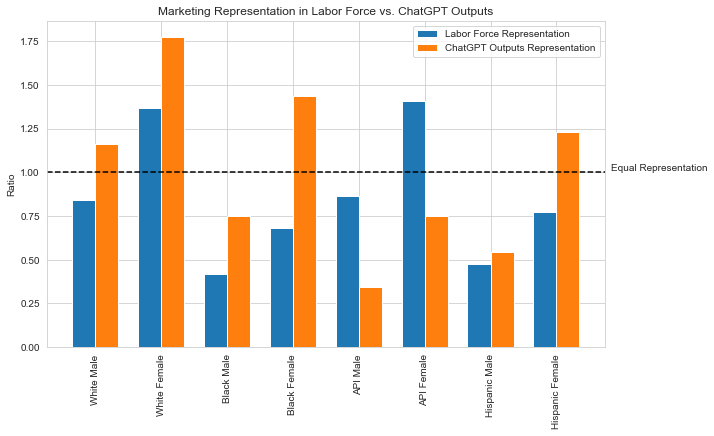

In [57]:
keys = list(marketing_lf_ratios.keys())
values_1 = list(marketing_lf_ratios.values())
values_2 = list(sorted_marketing_dict.values())

bar_width = 0.35
r1 = np.arange(len(keys))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(10, 6))

# Plot labor force vs. generated ChatGPT outputs for Marketing
plt.bar(r1, values_1, width=bar_width, label='Labor Force Representation')
plt.bar(r2, values_2, width=bar_width, label='ChatGPT Outputs Representation')

plt.ylabel('Ratio')
plt.title('Marketing Representation in Labor Force vs. ChatGPT Outputs')
plt.xticks([r + bar_width/2 for r in range(len(keys))], keys, rotation=90)
plt.legend()

plt.axhline(y=1, color='black', linestyle='--')
plt.text(len(keys), 1, 'Equal Representation', ha='left', va='bottom', transform=plt.gca().transData)

plt.show()